## Housing Prices Competition for Kaggle Learn Users

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, skew
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
sample_submission = pd.read_csv('dataset/sample_submission.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
test.shape

(1459, 80)

In [7]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Data Preprocessing

In [10]:
train_nan = train.isnull().sum()
train_nan = train_nan[train_nan > 0].sort_values(ascending=False)
print("Missing Values in training data:\n", train_nan)

Missing Values in training data:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


In [11]:
test_nan = test.isnull().sum()
test_nan = test_nan[test_nan > 0].sort_values(ascending=False)
print("Missing Values in test data:\n", test_nan)

Missing Values in test data:
 PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea         1
TotalBsmtSF        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64


In [12]:
train.duplicated().sum()

0

In [13]:
test.duplicated().sum()

0

In [14]:
cols_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
train = train.drop(columns=cols_to_drop)
test = test.drop(columns=cols_to_drop)

In [15]:
categorical_cols = train.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [16]:
numeric_cols = train.select_dtypes(include=['number']).columns
numeric_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [17]:
def bulk_impute(df):
       # Categorical cols to fill with 'None'
       none_fill = ['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
              'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'MasVnrType']
       df[none_fill] = df[none_fill].fillna('None')

       # Numerical cols to fill with 0
       zero_fill = ['MasVnrArea', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'BsmtFinSF1',
                     'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
       df[zero_fill] = df[zero_fill].fillna(0)

       # Fill LotFrontage with median by Neighborhood
       if 'LotFrontage' in df.columns:
              df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(
              lambda x: x.fillna(x.median())
              )

       # Categorical cols to fill with mode (most common value)
       mode_fill = ['MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd',
                     'SaleType', 'Functional', 'Utilities']
       for col in mode_fill:
              if col in df.columns:
                     df[col] = df[col].fillna(df[col].mode()[0])
    
       return df


In [18]:
train = bulk_impute(train)
test = bulk_impute(test)

if train.isnull().sum().any() > 0:
    print(train.isnull().sum())
else:
    print("There are no missing values in the train.")
    
if test.isnull().sum().any() > 0:
    print(test.isnull().sum())
else:
    print("There are no missing values in the test.")

There are no missing values in the train.
There are no missing values in the test.


### Exploratory Data Analysis (EDA)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [20]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.199658,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.431902,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


numerical columns

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

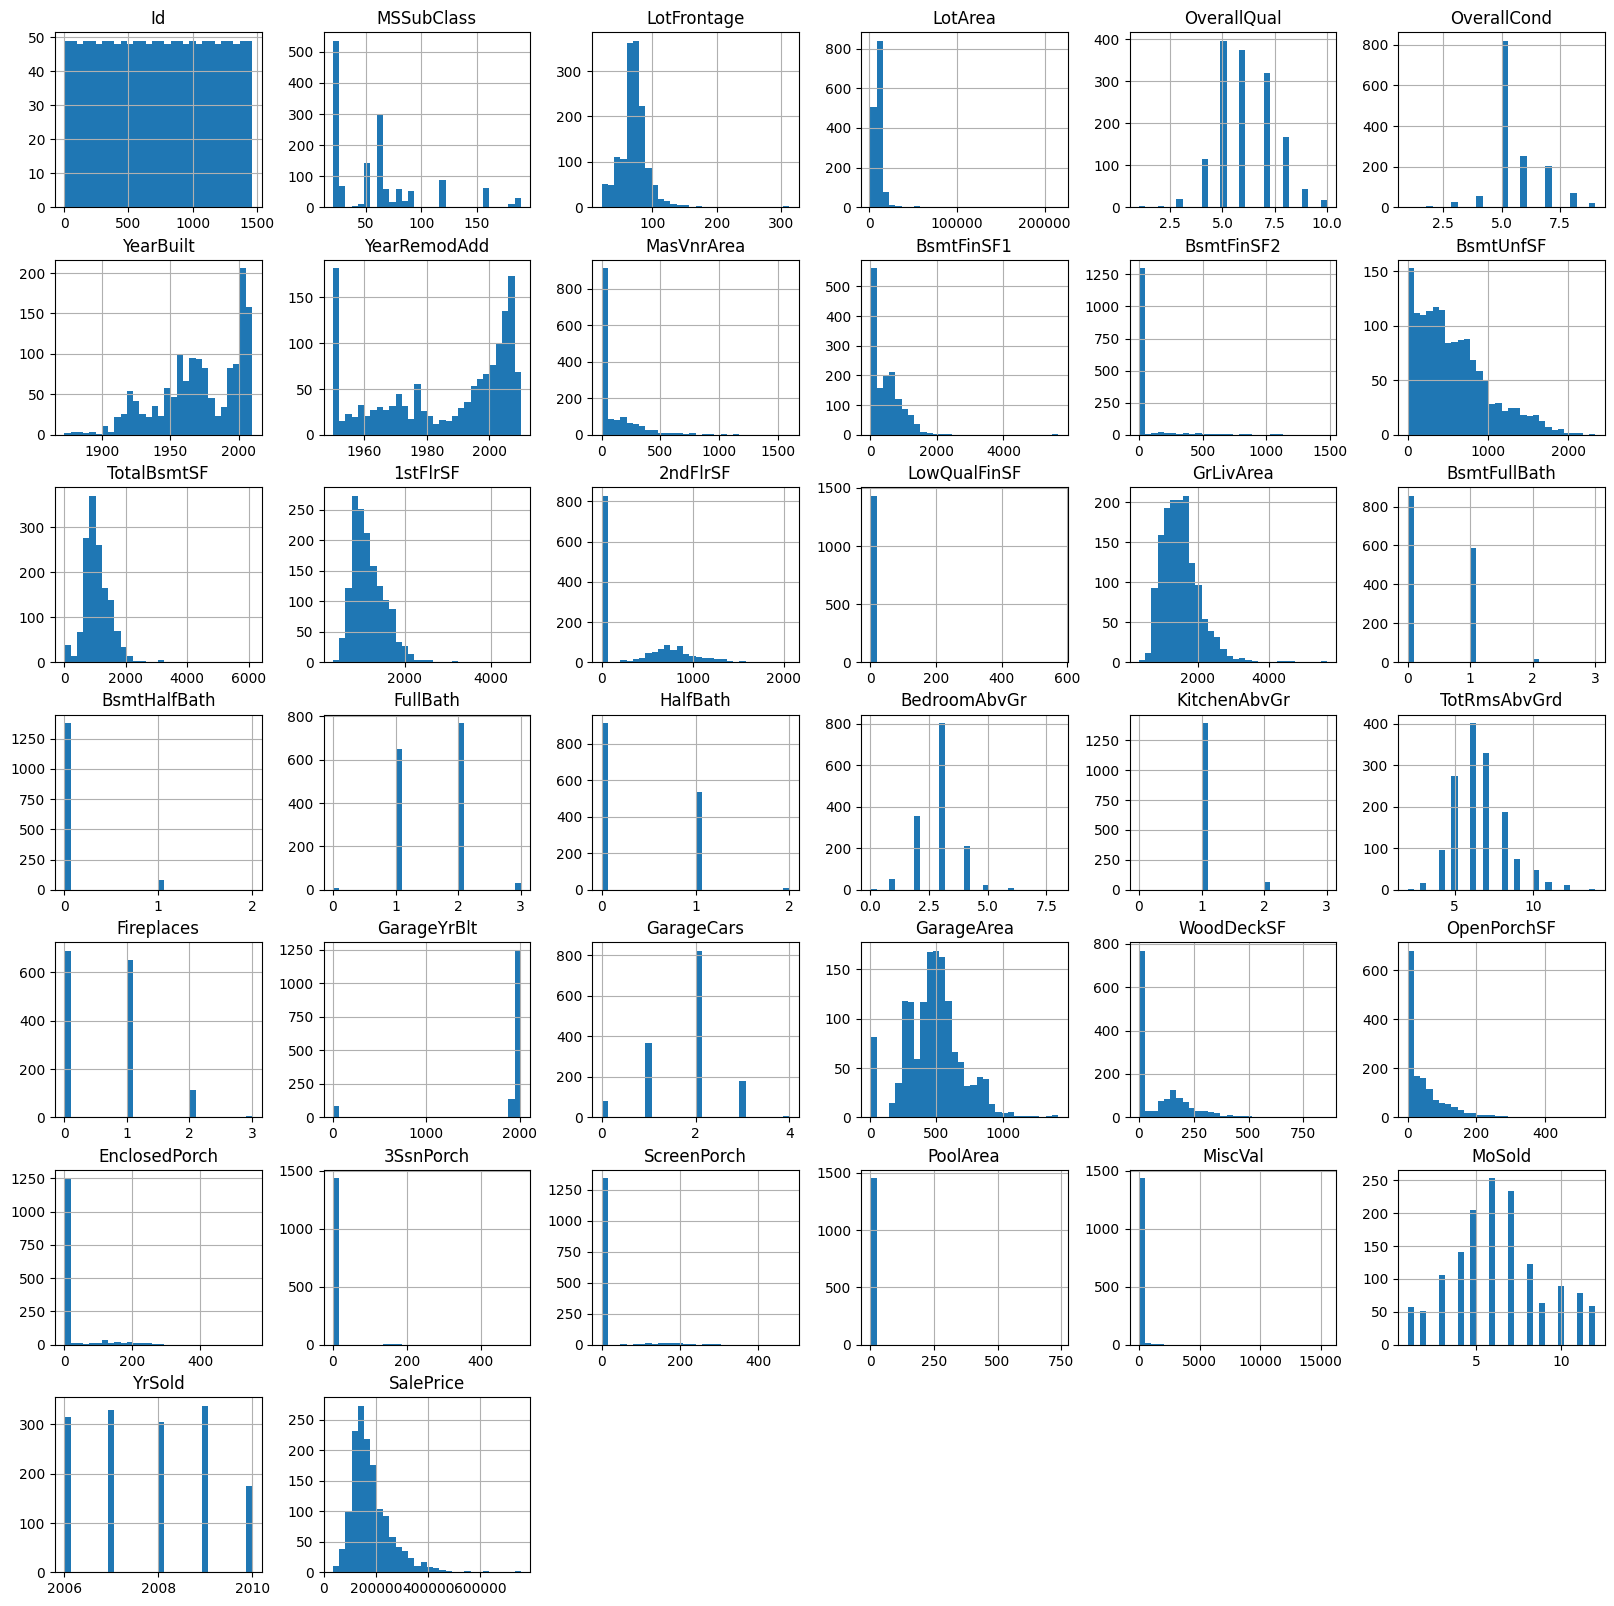

In [21]:
train[numeric_cols].hist(bins=30, figsize=(20, 20))

Observation:

1. SalePrice (the target): it is right-skewed with a long tail on the high end. Most homes cluster around $100k-$200k. A few very expensive ones drive the mean up. I will consider a log transformation.

2. GrLivArea (Above-ground living area): it is also right-skewed, most homes are under 2000 sqrft. Some very large homes are outliers.

3. YearBuilt: The peaks are in more recent years post 1950s, and more homes were built in 2000s.

4. TotalBsmtSF (Basement Area): a small peak at 0 indicates some homes have no basement. It is right-skewed. It could have a new column 'HasBasement'.

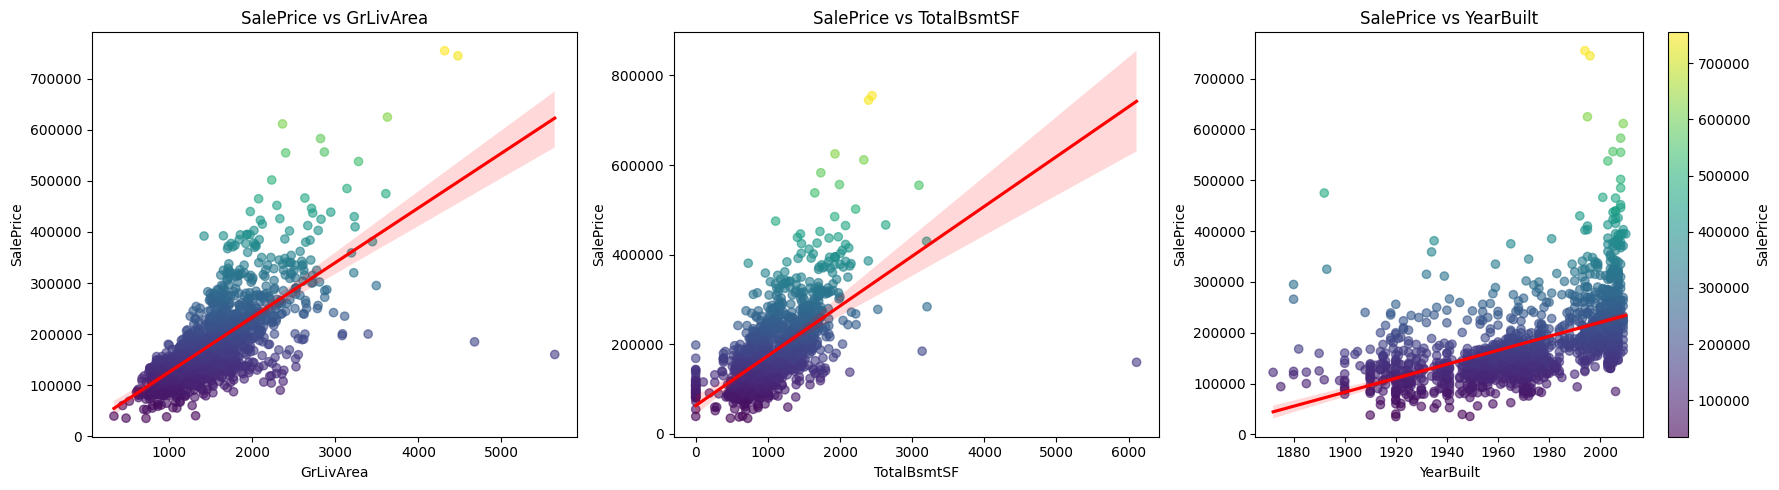

In [22]:
features = ['GrLivArea', 'TotalBsmtSF', 'YearBuilt']
train_subset = train[['SalePrice'] + features].dropna()

plt.figure(figsize=(18, 5))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    
    sc = plt.scatter(
        x=train_subset[feature],
        y=train_subset['SalePrice'],
        c=train_subset['SalePrice'],
        cmap='viridis',
        alpha=0.6
    )
    
    sns.regplot(
        x=feature, 
        y='SalePrice', 
        data=train_subset,
        scatter=False,
        line_kws={'color': 'red'}
    )
    
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

plt.colorbar(sc, ax=plt.gca(), label='SalePrice')

plt.tight_layout()
plt.show()


In [23]:
print(train[['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt']].corr())

             SalePrice  GrLivArea  TotalBsmtSF  YearBuilt
SalePrice     1.000000   0.708624     0.613581   0.522897
GrLivArea     0.708624   1.000000     0.454868   0.199010
TotalBsmtSF   0.613581   0.454868     1.000000   0.391452
YearBuilt     0.522897   0.199010     0.391452   1.000000


Observation:
- GrLivArea: Larger homes are generally priced higher, indicating that this feature is likely to be a strong predictor in the model.

- TotalBsmtSF: Bigger basement area is associated with higher sale price, though the correlation is weaker compared to GrLivArea.

- YearBuilt: Newer homes generally have higher SalePrice. There may be some exceptions or outliers like old homes are renovated or unique. The scatter plot shows a positive correlation (upward sloping line), this confirms the observation.

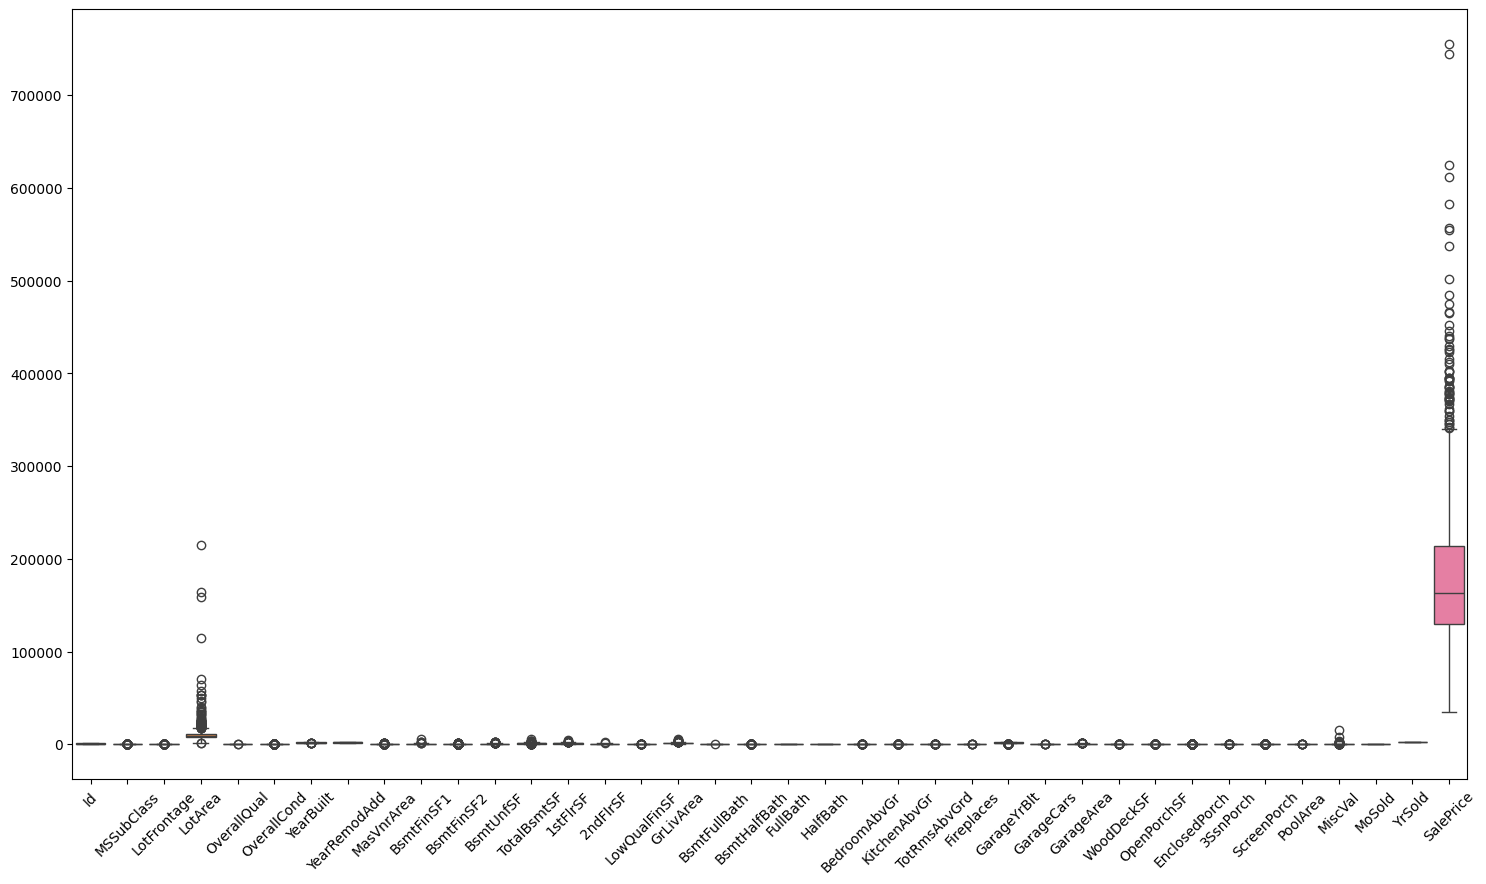

In [24]:
plt.figure(figsize=(18,10))
sns.boxplot(data=train[numeric_cols])
plt.xticks(rotation=45)
plt.show()

Observation: Majority of numerical columns have outliers.

In [25]:
for col in categorical_cols:
    print(f'\n==[{col}]==')
    print(train[col].value_counts())
    


==[MSZoning]==
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

==[Street]==
Street
Pave    1454
Grvl       6
Name: count, dtype: int64

==[LotShape]==
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

==[LandContour]==
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

==[Utilities]==
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

==[LotConfig]==
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

==[LandSlope]==
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

==[Neighborhood]==
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
Sto

Observation: Most of the numerical columns are imbalanced.

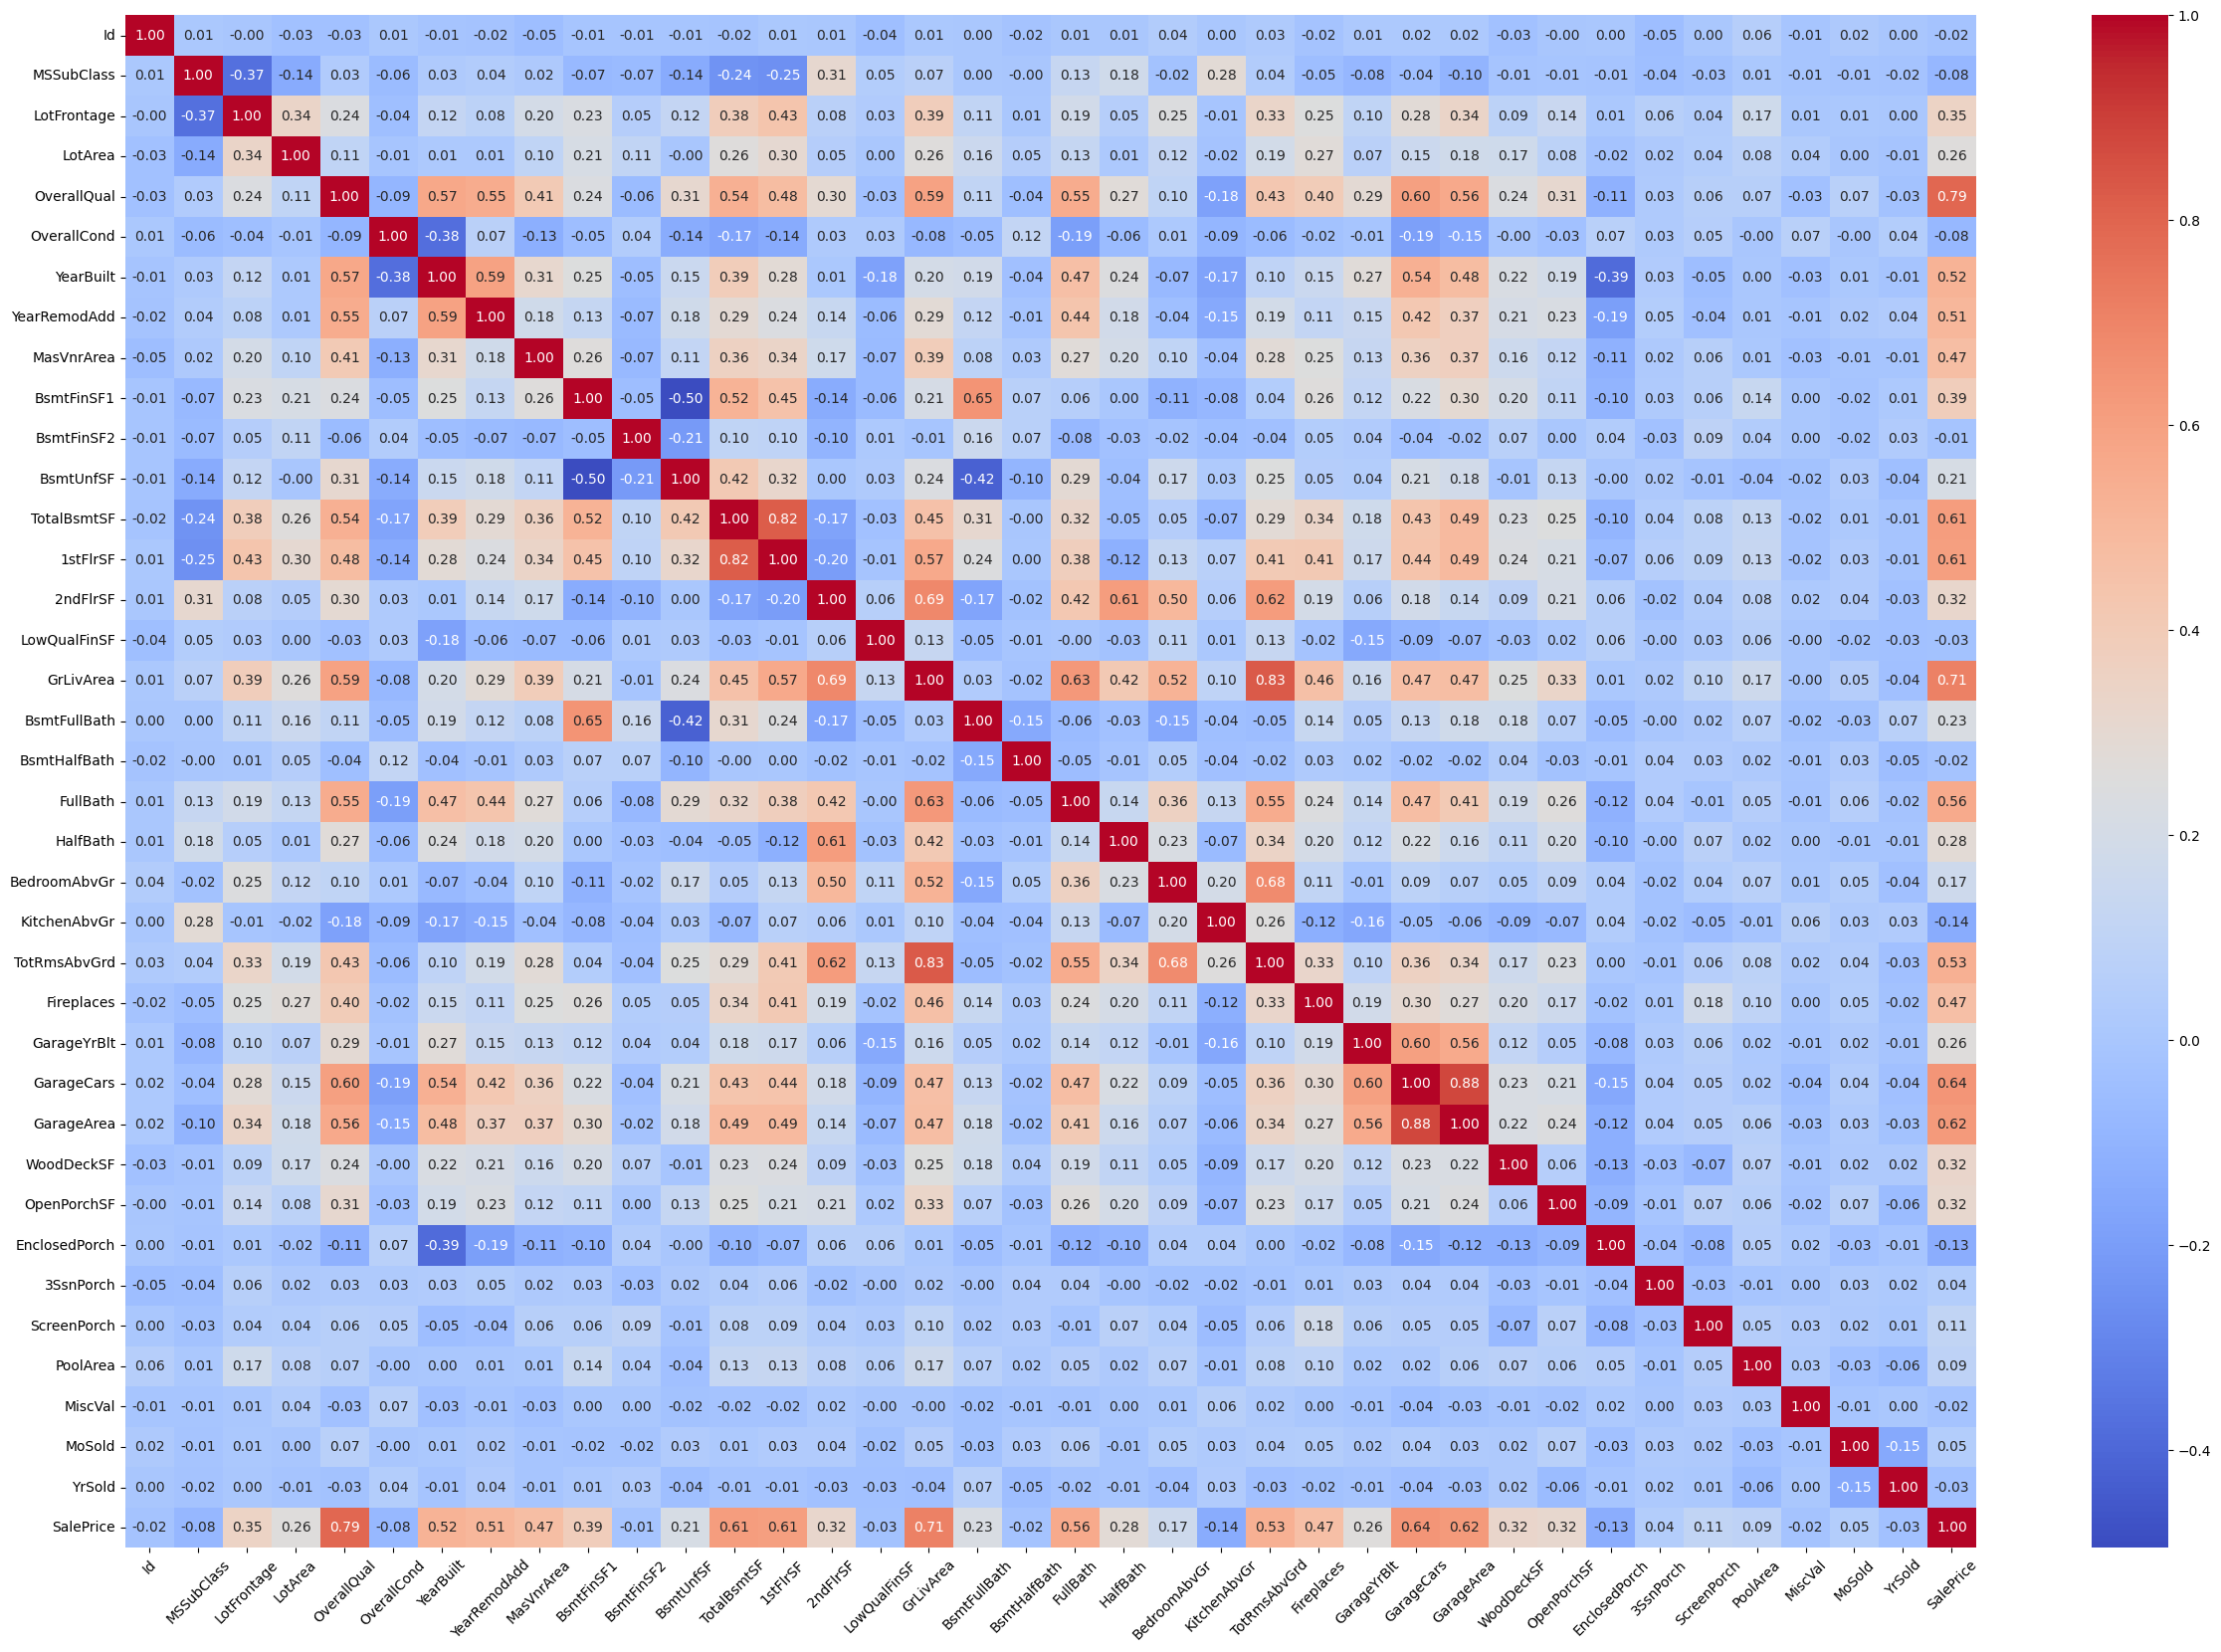

In [26]:
#Pearson Correlation for numerical columns

num_corr = train[numeric_cols].corr()

plt.figure(figsize=(30, 20))
sns.heatmap(num_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.xticks(rotation=45)
plt.show()

In [27]:
num_corr_ = num_corr['SalePrice'].sort_values(ascending=False)
num_corr_[1:]

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.349876
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

Observation of pearson correlation:

- OverallQual (0.79): The quality of overall property is the strongest positivie predictor of sale price. The higher quality homes are, the higher sale price is.
  
- GrLivArea (0.71): Above ground living area is also strongly positively correlated with sale price. Larger houses generally have higher prices.

- GarageCars (0.64), GarageArea (0.62): The number of cars that canfit in the garage and garage area size are positively correlated with price, showing that homes with bigger garage have a higher sale price.

- On the other hand, some features like 'BsmtFinSF2, BsmtHalfBath, MiscVal, Id, LowQualFinSF, YrSold, OverallCond, MSSubClass, EnclosedPorch, KitchenAbvGr' they either have weak and negative correlation or indicate potentially unimportance with SalePrice. 

- Id can be dropped for modeling. MSSubClass is categorical. MiscVal, LowQualFinSF, BsmtFinSF2 can be dropped as well. I can use YrSold for trend analysis, and OverallCond for checking the sale price.


In [28]:
columns_to_drop = ['MiscVal', 'LowQualFinSF', 'BsmtFinSF2']

train = train.drop(columns=columns_to_drop + ['Id'])

# keep id for submission
test = test.drop(columns=columns_to_drop)

# convert MSSubClass from numerical column to categorical column
train['MSSubClass'] = train['MSSubClass'].astype(str)
categorical_cols = list(categorical_cols)
categorical_cols.append('MSSubClass')

test['MSSubClass'] = test['MSSubClass'].astype(str)

In [ ]:
print('MSSubClass' in categorical_cols)
print('MiscVal' in train.columns)    
print('LowQualFinSF' in train.columns)
print('BsmtFinSF2' in train.columns)
print('Id' in train.columns)

True
False
False
False
False


categorical columns

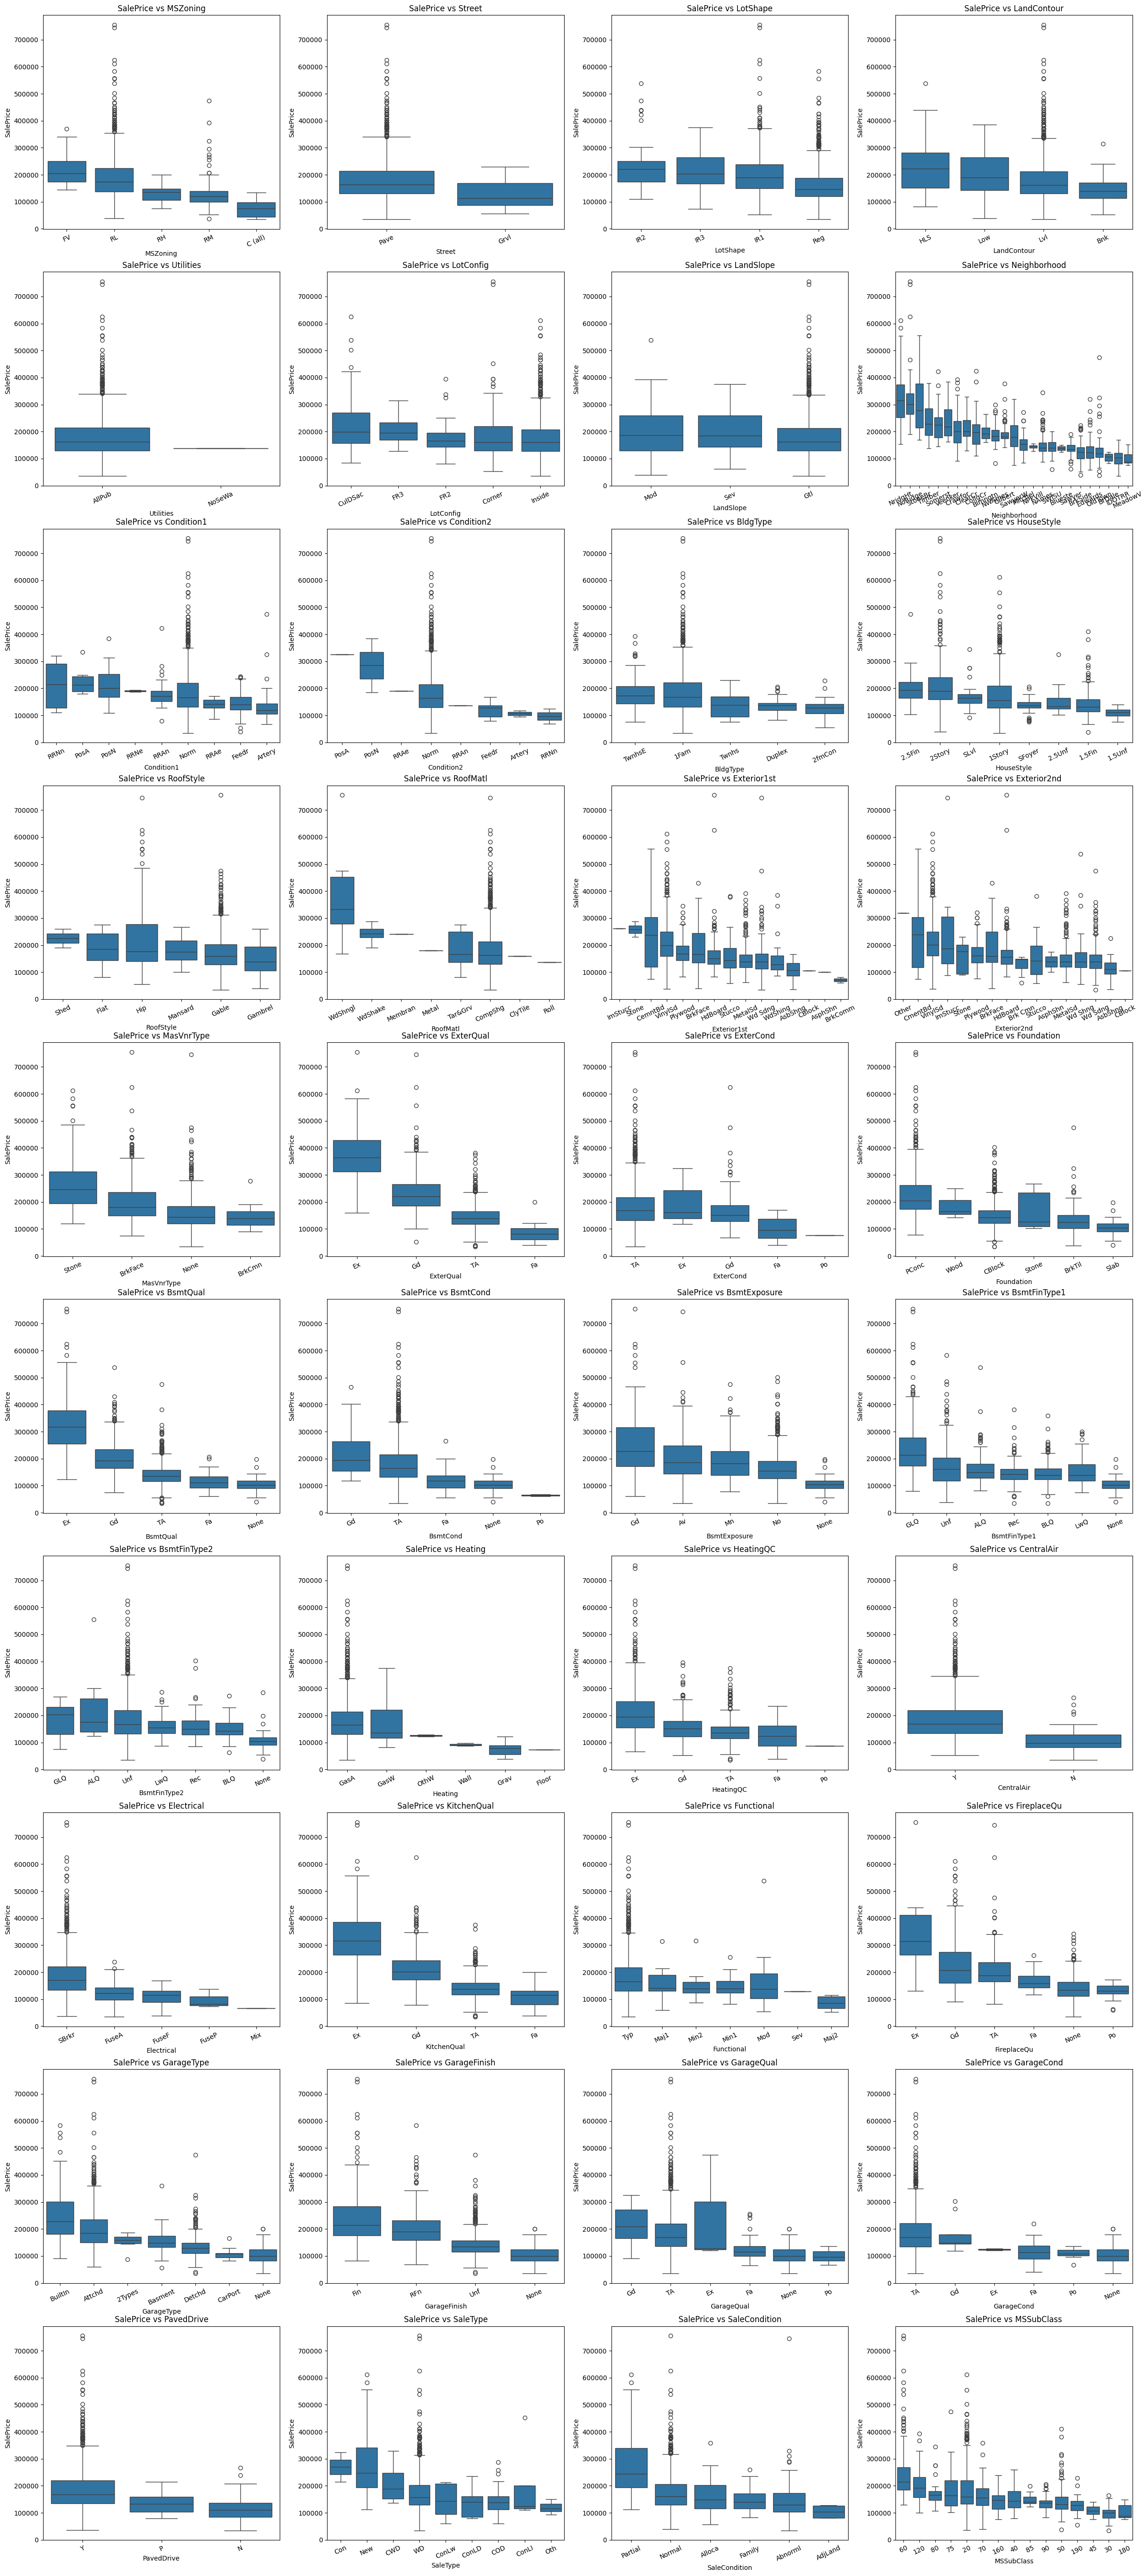

In [29]:
plt.figure(figsize=(30, 70))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(10, 4, i)
    order = train.groupby(col)['SalePrice'].median().sort_values(ascending=False).index
    sns.boxplot(data=train, x=col, y='SalePrice', order=order)
    plt.xticks(rotation=25)
    plt.title(f'SalePrice vs {col}')
    
plt.tight_layout
plt.show()


Observation:
ExterQual, KitchenQual, GarageFinish, FireplaceQu, BsmtQual and BsmtExposure are having strong predictors. These will play a major role in modeling.

In [38]:
features_to_check = ['Neighborhood', 'MSZoning', 'Condition1', 'Foundation']

for col in features_to_check:
    print(f"\n=== {col} ===")
    print(train.groupby(col)['SalePrice'].median().sort_values(ascending=False))


=== Neighborhood ===
Neighborhood
NridgHt    315000.0
NoRidge    301500.0
StoneBr    278000.0
Timber     228475.0
Somerst    225500.0
Veenker    218000.0
Crawfor    200624.0
ClearCr    200250.0
CollgCr    197200.0
Blmngtn    191000.0
NWAmes     182900.0
Gilbert    181000.0
SawyerW    179900.0
Mitchel    153500.0
NPkVill    146000.0
NAmes      140000.0
SWISU      139500.0
Blueste    137500.0
Sawyer     135000.0
BrkSide    124300.0
Edwards    121750.0
OldTown    119000.0
BrDale     106000.0
IDOTRR     103000.0
MeadowV     88000.0
Name: SalePrice, dtype: float64

=== MSZoning ===
MSZoning
FV         205950.0
RL         174000.0
RH         136500.0
RM         120500.0
C (all)     74700.0
Name: SalePrice, dtype: float64

=== Condition1 ===
Condition1
RRNn      214000.0
PosA      212500.0
PosN      200000.0
RRNe      190750.0
RRAn      171495.0
Norm      166500.0
RRAe      142500.0
Feedr     140000.0
Artery    119550.0
Name: SalePrice, dtype: float64

=== Foundation ===
Foundation
PConc    

Observation: 
- Neighborhood: NridgHt neighborhood has the highest median sale price (~315k). This suggests that neighborhood plays a major role in home value. However, MeadowV neighborhood has the lowest sale price around 88k.
  
- MSZoning: FV zoning area home have the highest median sale price (~205k) while those in the C (all) zone have the lowest. 

- Condition1: RRNn (Regular - Near neighborhood) condition are priced the highest (~214k). Depending on it is near a neighborhood or close to an arterial road (Artery), it impacts its price. Homes with better conditions tend to be more expensive, while those with less favorable locations are priced lower.

- Foundation: The quality and age of the home is associated with the type of foundation. The concrete foundations are often associated with higher-quality construction, indicating higher sale prices.

In [ ]:
# ANOVA F-test for categorical feature and a numerical feature

from scipy.stats import f_oneway

anova_result = []

print("ANOVA result for\n")
for col in categorical_cols:
    groups = [train[train[col] == category]['SalePrice'] for category in train[col].unique()]
    
    f_stat, p_value = f_oneway(*groups)

    print(f"{col}: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")

    if p_value < 0.05:
        print(f"The categorical feature '{col}' has a significant relationship with 'SalePrice'.\n")
        anova_result.append({'feature': col, 'F_statistic': f_stat})
        
anova_df = pd.DataFrame(anova_result)
anova_df = anova_df.sort_values(by='F_statistic', ascending=False)
print(anova_df[['feature', 'F_statistic']].to_string(index=False))

ANOVA result for

MSZoning: F-statistic = 43.84, p-value = 0.0000
The categorical feature 'MSZoning' has a significant relationship with 'SalePrice'.

Street: F-statistic = 2.46, p-value = 0.1170
LotShape: F-statistic = 40.13, p-value = 0.0000
The categorical feature 'LotShape' has a significant relationship with 'SalePrice'.

LandContour: F-statistic = 12.85, p-value = 0.0000
The categorical feature 'LandContour' has a significant relationship with 'SalePrice'.

Utilities: F-statistic = 0.30, p-value = 0.5847
LotConfig: F-statistic = 7.81, p-value = 0.0000
The categorical feature 'LotConfig' has a significant relationship with 'SalePrice'.

LandSlope: F-statistic = 1.96, p-value = 0.1414
Neighborhood: F-statistic = 71.78, p-value = 0.0000
The categorical feature 'Neighborhood' has a significant relationship with 'SalePrice'.

Condition1: F-statistic = 6.12, p-value = 0.0000
The categorical feature 'Condition1' has a significant relationship with 'SalePrice'.

Condition2: F-statistic =

Observation of top F-statistic insights:
- ExterQual (443.33): Exterior quality shows a very strong relationship with SalePrice, suggesting the quality of the exterior significantly influences the price of the house.
  
- KitchenQual (407.81): Kitchen quality also has a very high f-statistic, indicating the kitchen quality plays a major role in determining the house's sale price.
  
- BsmtQual (316.15): How the basement is finished or is high-quality matters to house's usable place, and buyers likely place a premium on well-maintained or finished basements. 
  
- GarageFinish (213.87): Garage quality and finish is a strong predictor as well. Homes with well-finished garages likely attract higher prices because they are seen as more functional and aesthetically pleasing.
  
- FireplaceQu (121.08): Fireplace quality also appears to influence house price. Having a fireplace, or a high-quality one can add to the home's value.
    
- MasVnrType (108.91): Masonry Veneer type is significant in predicting sale price. They type of masonry veneer like brick or stone likely impacts the home's curb appeal and perceived value.
  

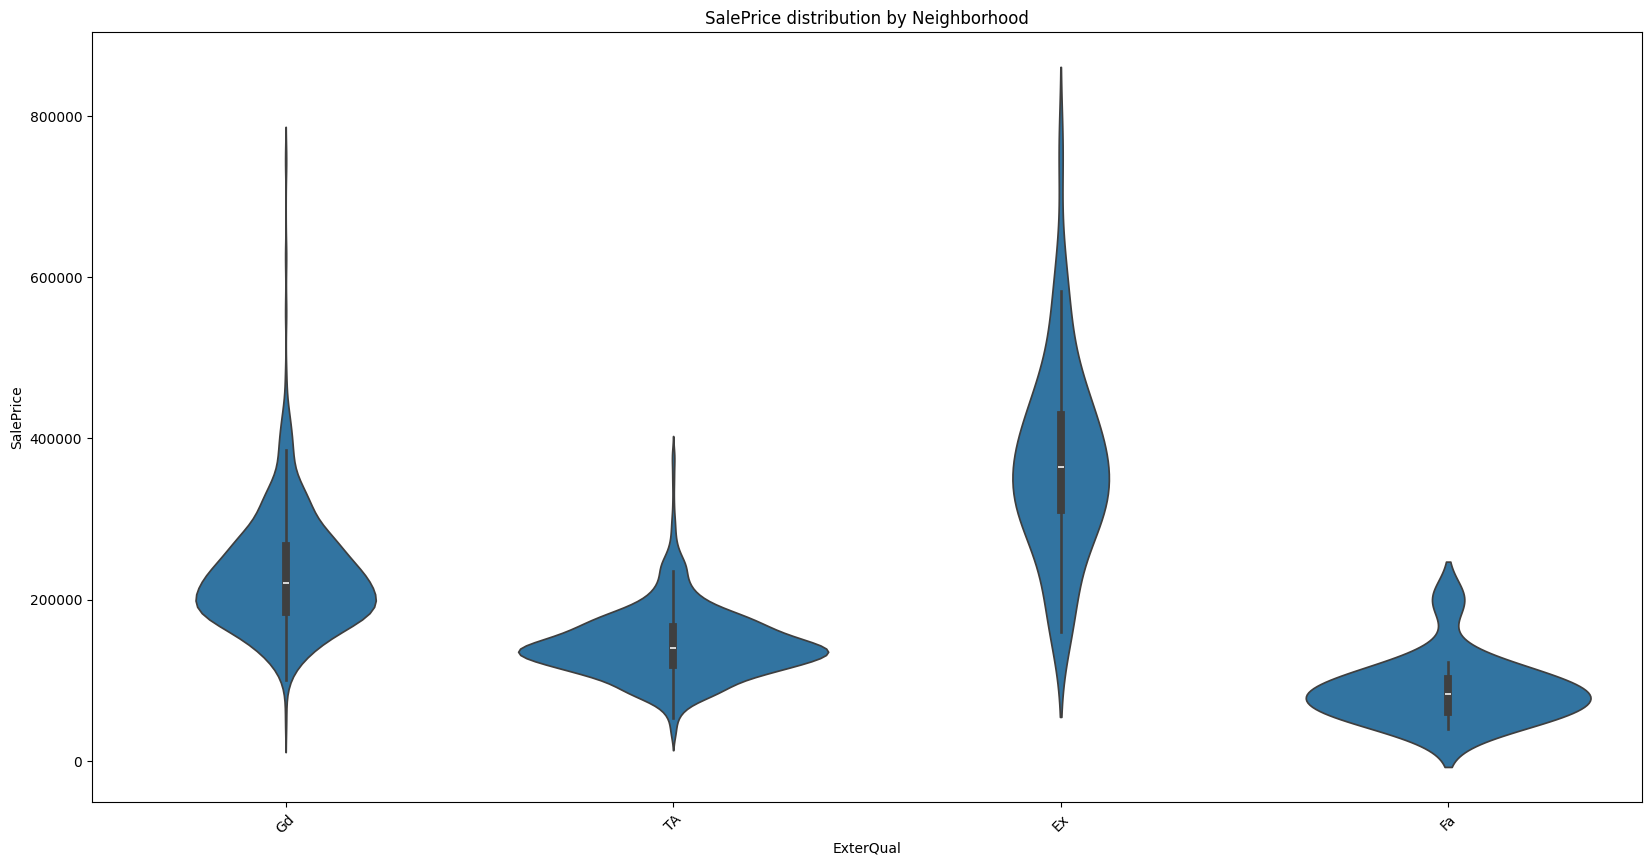

In [40]:
plt.figure(figsize=(20,10))
sns.violinplot(x='ExterQual', y='SalePrice', data=train)
plt.title('SalePrice distribution by Neighborhood')
plt.xticks(rotation=45)
plt.show()

- External quality shows the more excellent the quality is, the higher sale price is. Typical and average homes and Fair quality houses are mostly in lower price brackets.

- ExterQual can be encoded as ordinal Fa< TA< Gd< Ex

In [41]:
exterqual_avg = train.groupby('ExterQual')['SalePrice'].mean().sort_values(ascending=False)
exterqual_avg

ExterQual
Ex    367360.961538
Gd    231633.510246
TA    144341.313466
Fa     87985.214286
Name: SalePrice, dtype: float64

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6852\1740467693.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=exterqual_avg.index, y=exterqual_avg.values, palette='Blues_d')


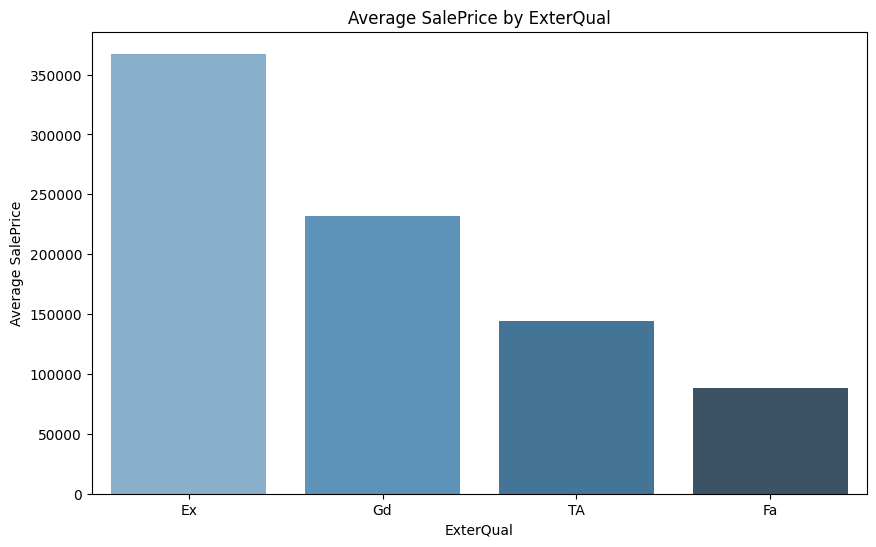

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=exterqual_avg.index, y=exterqual_avg.values, palette='Blues_d')
plt.title('Average SalePrice by ExterQual')
plt.ylabel('Average SalePrice')
plt.xlabel('ExterQual')
plt.show()

### Feature Engineering

handling imbalance, encoding categorical variables, sclaing numerical features

### Rmarkdown

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X = train[categorical_cols]
y = train['saleprice']
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Regressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Feature importance to understand the relationship between categorical features and target
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)


### Random Forest

### XGBoost

### LASSO regression

### Gradient Boosting

### Root-Mean-Squared-Error (RMSE)